In [1]:
import torch
import numpy             as np
import matplotlib.pyplot as plt

from ipywidgets     import interact
from torch.optim    import Adam
from tqdm           import tqdm
from astropy        import constants, units
from pomme.model import TensorModel
from pomme.loss  import Loss, diff_loss, SphericalLoss
from pomme.lines import Line
from pomme.plot  import plot_cube_2D

from run_CO import frequencies, velocities, obs, run, init, fit, forward, forward_analytic_velo_and_T

/home/frederikd/.local/lib/python3.9/site-packages/astroquery/lamda/core.py:145: UserWarning: The first time a LAMDA function is called, it must assemble a list of valid molecules and URLs.  This list will be cached so future operations will be faster.
  warnings.warn("The first time a LAMDA function is called, it must "


You have selected line:
    CO(J=3-2)
Please check the properties that were inferred:
    Frequency         3.457959899e+11  Hz
    Einstein A coeff  2.497000000e-06  1/s
    Molar mass        28.0101          g/mol


TypeError: LTE_image_along_last_axis() got an unexpected keyword argument 'density'

In [14]:
frequencies[0] / 1.0e9

tensor(345.7556)

In [15]:
frequencies[-1] / 1.0e9

tensor(345.8364)

In [16]:
line = Line('CO', 2)

You have selected line:
    CO(J=3-2)
Please check the properties that were inferred:
    Frequency         3.457959899e+11  Hz
    Einstein A coeff  2.497000000e-06  1/s
    Molar mass        28.0101          g/mol


In [17]:
# img, loss = init()

In [18]:
model = TensorModel.load('models/model_3D_CO_all.h5')
model.info()

Variable key:              Free/Fixed:   Field:    Min:           Mean:          Max:
  beta                       Free          False    +2.518e+00     +2.518e+00     +2.518e+00
  log_CO                     Free          True     +1.112e+01     +1.485e+01     +2.680e+01
  log_T_in                   Free          False    +8.130e+00     +8.130e+00     +8.130e+00
  log_epsilon                Free          False    -3.191e+00     -3.191e+00     -3.191e+00
  log_v_in                   Free          False    +3.372e+00     +3.372e+00     +3.372e+00
  log_v_inf                  Fixed         False    +9.473e+00     +9.473e+00     +9.473e+00
  log_v_turbulence           Fixed         True     +5.011e+00     +5.011e+00     +5.011e+00
sizes: [7.46717267e+13 7.46169581e+13 7.36127621e+13]
shape: (64, 64, 64)


In [5]:
r = model.get_radius(origin='centre')
d = r / r.min()

In [8]:
r.min() / (1.0 * units.au).si.value

6.720880907034964

In [5]:
(model['log_CO']/np.log(10)).max()

tensor(10., dtype=torch.float64, grad_fn=<MaxBackward1>)

In [6]:
img = fit(loss, model, obs, N_epochs=5, lr=1.0e-1, w_rep=1.0e+0)
loss.renormalise_all()
loss.reset()

  0%|          | 0/5 [00:00<?, ?it/s]

/home/frederikd/.local/lib/python3.9/site-packages/torch/autograd/__init__.py:200: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
100%|██████████| 5/5 [00:36<00:00,  7.20s/it]


  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:21<00:00,  7.09s/it]


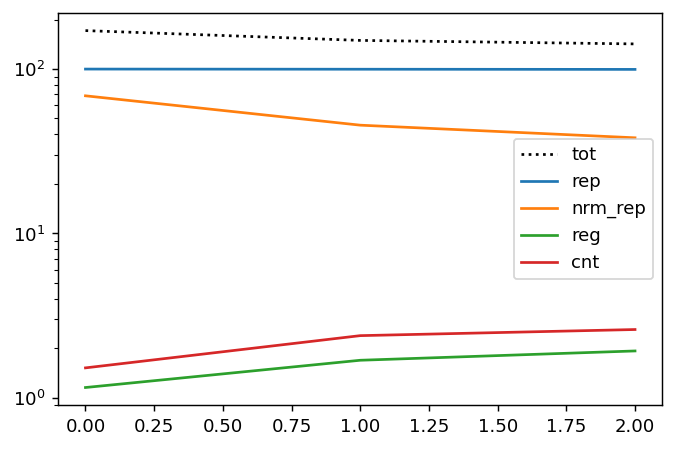

In [7]:
img = fit(loss, model, obs, N_epochs=3, lr=1.0e-1, w_rep=1.0e+2, w_nrm_rep=1.0e+2)
loss.plot()

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [05:55<00:00,  7.12s/it]


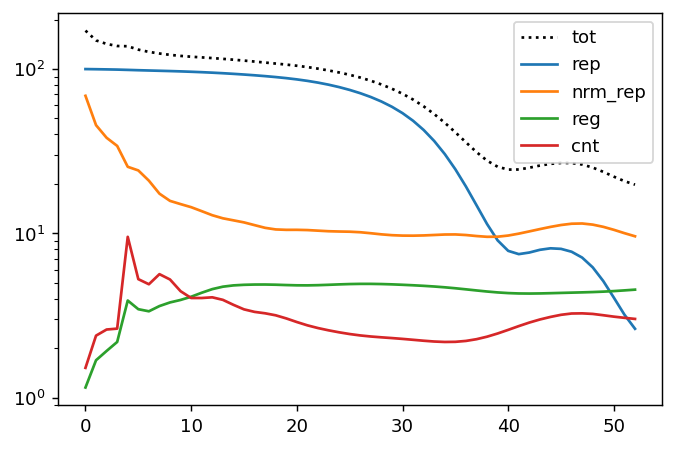

In [8]:
img = fit(loss, model, obs, N_epochs=50, lr=1.0e-1, w_rep=1.0e+2, w_nrm_rep=1.0e+2)
loss.plot()

100%|██████████| 50/50 [05:52<00:00,  7.05s/it]


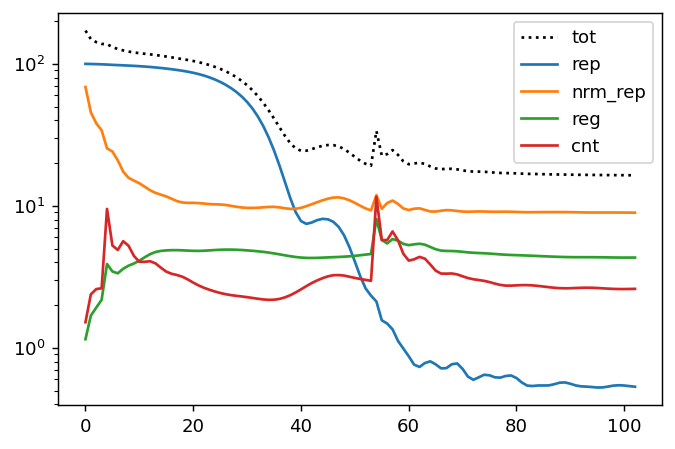

In [9]:
img = fit(loss, model, obs, N_epochs=50, lr=1.0e-1, w_rep=1.0e+2, w_nrm_rep=1.0e+2)
loss.plot()

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [05:45<00:00,  6.91s/it]


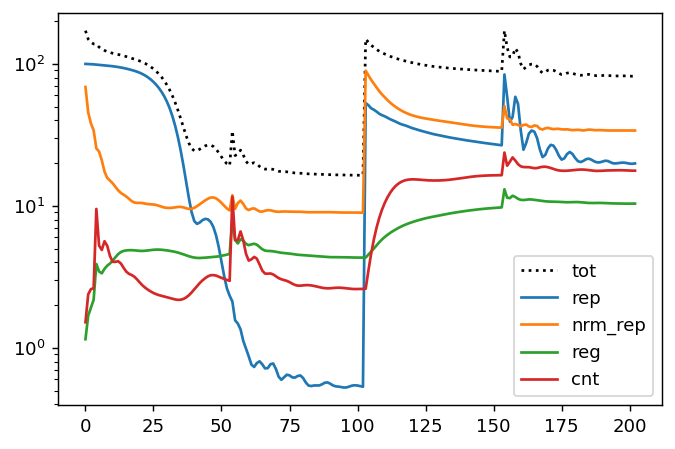

In [30]:
img = fit(loss, model, obs, N_epochs=50, lr=1.0e-1, w_rep=1.0e+4, w_nrm_rep=1.0e+3)
loss.plot()

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [05:48<00:00,  6.97s/it]


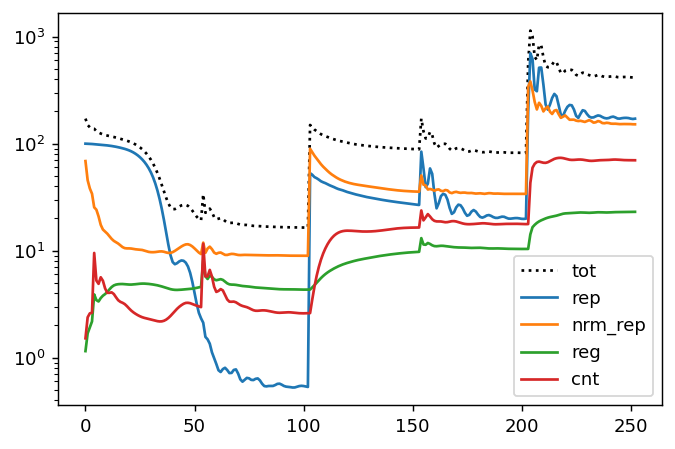

In [31]:
img = fit(loss, model, obs, N_epochs=50, lr=1.0e-1, w_rep=1.0e+5, w_nrm_rep=1.0e+4)
loss.plot()

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [12:07<00:00,  7.27s/it]


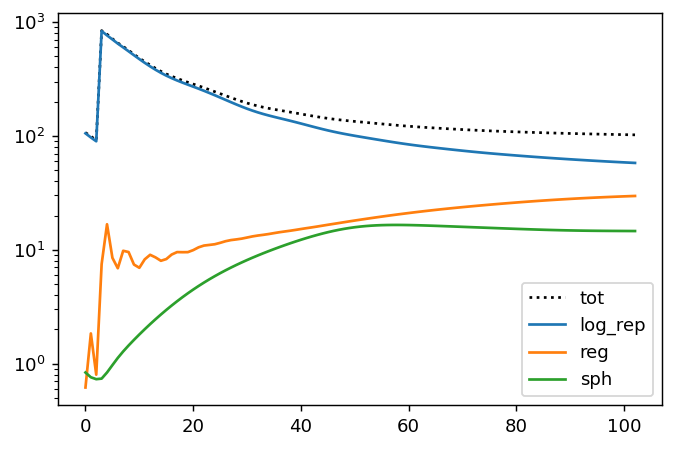

In [ ]:
img = fit(loss, model, obs, N_epochs=100, lr=1.0e-1, w_rep=1.0e+3, w_reg=1.0e+1)
loss.plot()

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [05:46<00:00,  6.93s/it]


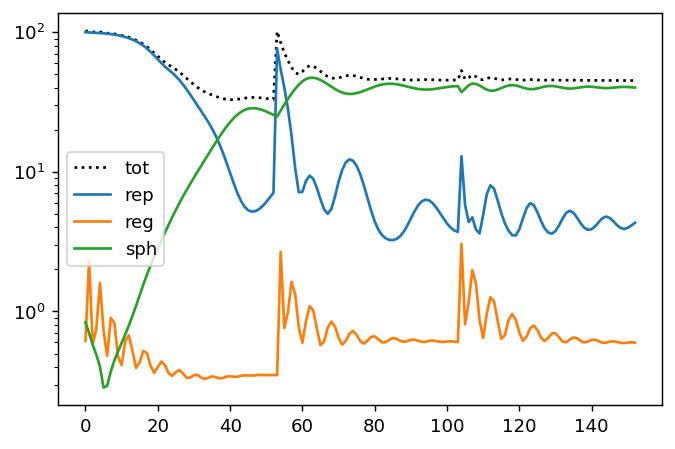

In [24]:
img = fit(loss, model, obs, N_epochs=50, lr=1.0e-1, w_rep=1.0e+3)
loss.plot()

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [05:53<00:00,  7.08s/it]


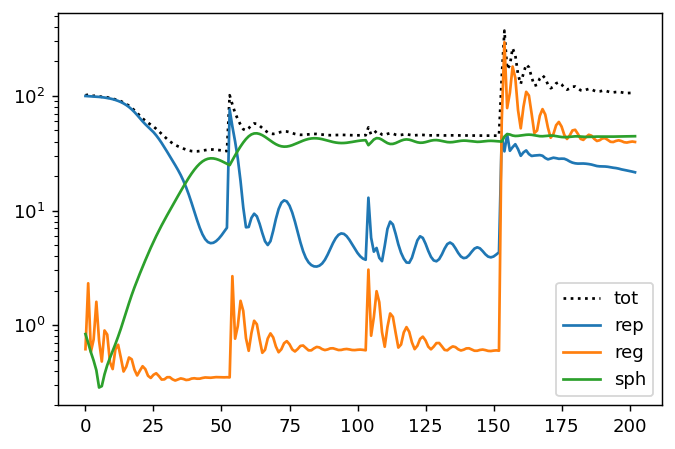

In [32]:
img = fit(loss, model, obs, N_epochs=50, lr=1.0e-1, w_rep=1.0e+4, w_reg=1.0e+2)
loss.plot()

100%|██████████| 50/50 [05:36<00:00,  6.72s/it]


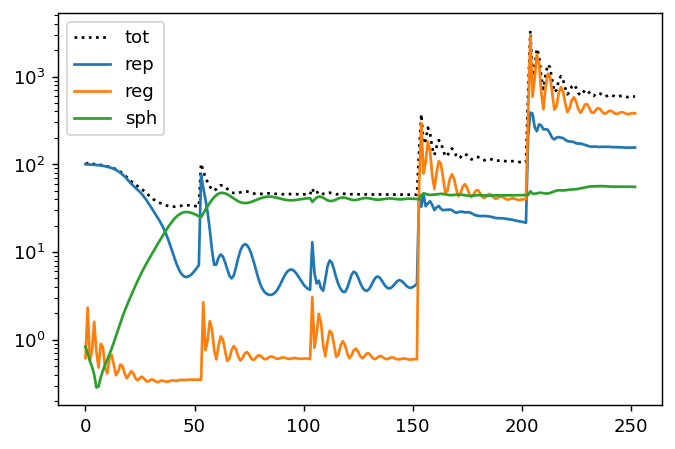

In [46]:
img = fit(loss, model, obs, N_epochs=50, lr=1.0e-1, w_rep=1.0e+5, w_reg=1.0e+3)
loss.plot()

100%|██████████| 50/50 [05:23<00:00,  6.48s/it]


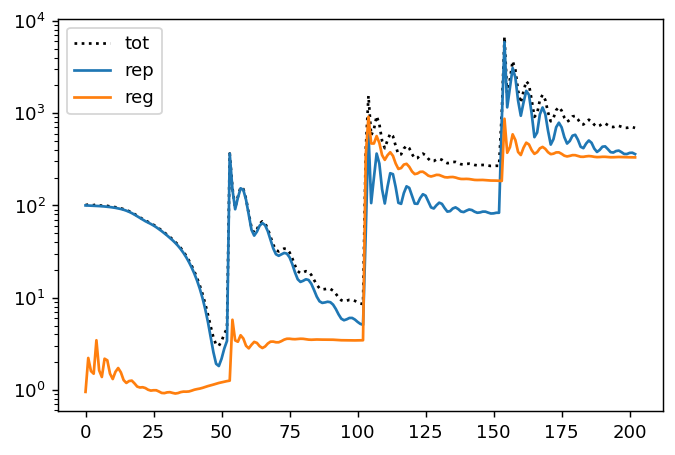

In [26]:
img = fit(loss, model, obs, N_epochs=50, lr=1.0e-1, w_rep=1.0e+6, w_reg=1.0e+2)
loss.plot()

100%|██████████| 50/50 [05:36<00:00,  6.72s/it]


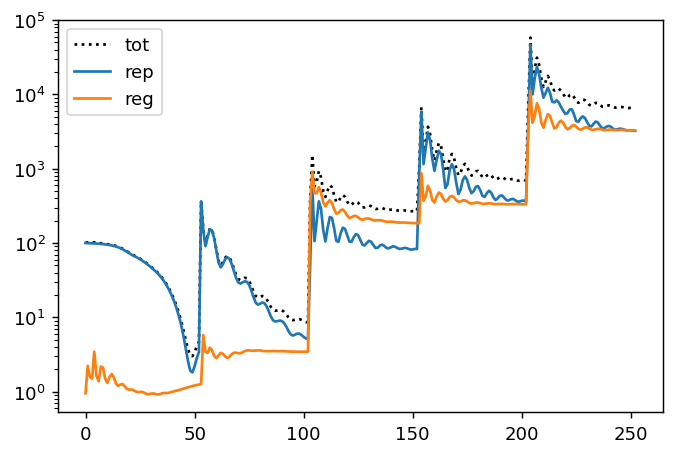

In [34]:
img = fit(loss, model, obs, N_epochs=50, lr=1.0e-1, w_rep=1.0e+7, w_reg=1.0e+3)
loss.plot()

100%|██████████| 50/50 [05:36<00:00,  6.72s/it]


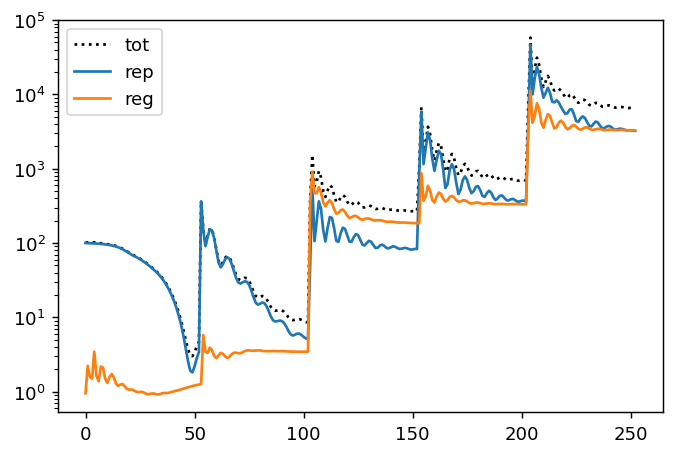

In [ ]:
img = fit(loss, model, obs, N_epochs=50, lr=1.0e-1, w_rep=1.0e+7, w_reg=1.0e+3)
loss.plot()

100%|██████████| 50/50 [06:28<00:00,  7.77s/it]


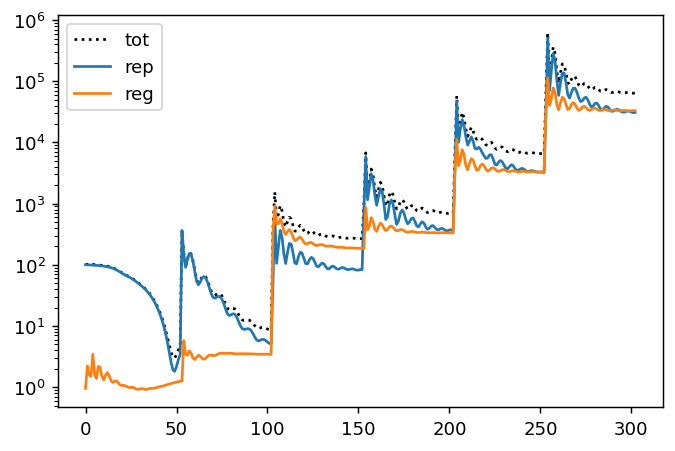

In [42]:
img = fit(loss, model, obs, N_epochs=50, lr=1.0e-1, w_rep=1.0e+8, w_reg=1.0e+4)
loss.plot()

100%|██████████| 50/50 [06:31<00:00,  7.82s/it]


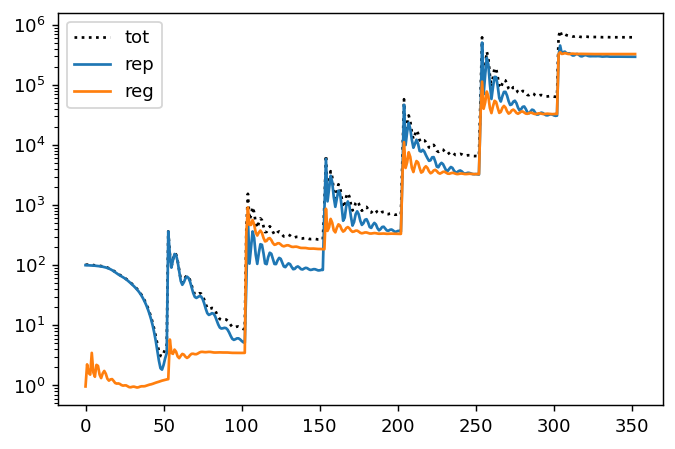

In [51]:
img = fit(loss, model, obs, N_epochs=50, lr=2.0e-2, w_rep=1.0e+9, w_reg=1.0e+5)
loss.plot()

In [ ]:
img = fit(loss, model, obs, N_epochs=50, lr=1.0e-2, w_rep=1.0e+9, w_reg=1.0e+5)
loss.plot()

100%|██████████| 50/50 [06:31<00:00,  7.82s/it]


In [32]:
model.save('models/model_3D_CO_all.h5')

In [19]:
model = TensorModel.load('models/model_3D_CO_all.h5')

In [20]:
plot_cube_2D(model['log_CO'].T)

/tmp/ipykernel_1007683/1208567560.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  plot_cube_2D(model['log_CO'].T)


interactive(children=(IntSlider(value=31, description='z', max=63), Output()), _dom_classes=('widget-interact'…

<function pomme.plot.plot_cube_2D.<locals>.plot(z)>

In [21]:
plot_cube_2D(model['log_CO'])

interactive(children=(IntSlider(value=31, description='z', max=63), Output()), _dom_classes=('widget-interact'…

<function pomme.plot.plot_cube_2D.<locals>.plot(z)>

In [36]:
img = forward_analytic_velo_and_T(model)

In [37]:
plot_cube_2D(torch.log(img+1.0e-10))

interactive(children=(IntSlider(value=49, description='z', max=99), Output()), _dom_classes=('widget-interact'…

<function pomme.plot.plot_cube_2D.<locals>.plot(z)>

In [38]:
plot_cube_2D(img)

interactive(children=(IntSlider(value=49, description='z', max=99), Output()), _dom_classes=('widget-interact'…

<function pomme.plot.plot_cube_2D.<locals>.plot(z)>

In [39]:
img.max()

tensor(0.0538, dtype=torch.float64, grad_fn=<MaxBackward1>)

In [40]:
from ipywidgets import interact

def plot(i,j):
    plt.figure(dpi=150)
    plt.plot   (line.freq_to_velo(frequencies          * units.Hz), obs[i,j,:].data)
    plt.plot   (line.freq_to_velo(frequencies          * units.Hz), img[i,j,:].data, marker='x')
    # plt.yscale('log')
interact(plot, i=(0, img.shape[0]-1), j=(0, img.shape[1]-1) )

interactive(children=(IntSlider(value=31, description='i', max=63), IntSlider(value=31, description='j', max=6…

<function __main__.plot(i, j)>

In [51]:
dat = torch.einsum('ijf, ij -> ijf', obs, 1.0/obs.mean(dim=2))
dat

tensor([[[1.2111e-14, 1.2111e-14, 1.2111e-14,  ..., 1.2111e-14,
          1.2111e-14, 1.2111e-14],
         [1.1956e-14, 1.1956e-14, 1.1956e-14,  ..., 1.1956e-14,
          1.1956e-14, 1.1956e-14],
         [1.1689e-14, 1.1689e-14, 1.1689e-14,  ..., 1.1689e-14,
          1.1689e-14, 1.1689e-14],
         ...,
         [1.0720e-14, 1.0720e-14, 1.0720e-14,  ..., 1.0720e-14,
          1.0720e-14, 1.0720e-14],
         [1.1127e-14, 1.1127e-14, 1.1127e-14,  ..., 1.1127e-14,
          1.1127e-14, 1.1127e-14],
         [1.1241e-14, 1.1241e-14, 1.1241e-14,  ..., 1.1241e-14,
          1.1241e-14, 1.1241e-14]],

        [[1.1892e-14, 1.1892e-14, 1.1892e-14,  ..., 1.1892e-14,
          1.1892e-14, 1.1892e-14],
         [1.1825e-14, 1.1825e-14, 1.1825e-14,  ..., 1.1825e-14,
          1.1825e-14, 1.1825e-14],
         [1.1443e-14, 1.1443e-14, 1.1443e-14,  ..., 1.1443e-14,
          1.1443e-14, 1.1443e-14],
         ...,
         [1.0653e-14, 1.0653e-14, 1.0653e-14,  ..., 1.0653e-14,
          1.065

In [52]:
def plot(i,j):
    plt.figure(dpi=150)
    plt.plot   (line.freq_to_velo(frequencies          * units.Hz), dat[i,j,:].data)
interact(plot, i=(0, img.shape[0]-1), j=(0, img.shape[1]-1) )

interactive(children=(IntSlider(value=31, description='i', max=63), IntSlider(value=31, description='j', max=6…

<function __main__.plot(i, j)>

In [42]:
img.min()

tensor(-1.4511e-17, dtype=torch.float64, grad_fn=<MinBackward1>)

In [47]:
img.mean(dim=1)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64,
       grad_fn=<MeanBackward1>)

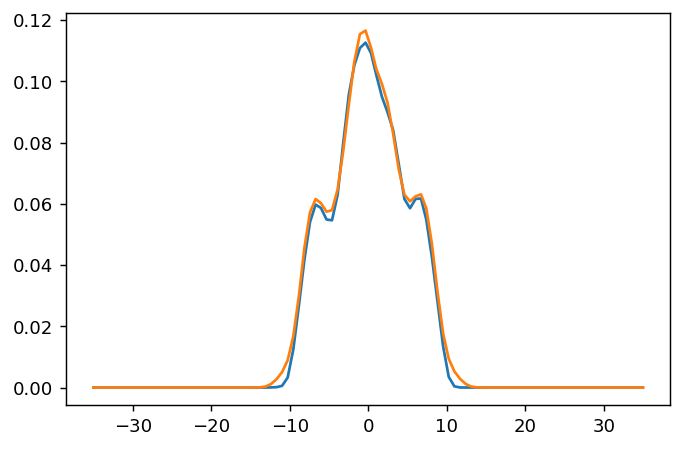

In [19]:
plt.figure(dpi=130)
plt.plot(velocities/1.0e+3, obs.data.sum(dim=(0,1)))
plt.plot(velocities/1.0e+3, img.data.sum(dim=(0,1)))

In [23]:
model.info()

Variable key:              Free/Fixed:   Field:    Min:           Mean:          Max:
  beta                       Free          False    +4.348e+00     +4.348e+00     +4.348e+00
  log_CO                     Free          True     +1.711e+01     +1.739e+01     +2.766e+01
  log_T_in                   Free          False    +1.013e+01     +1.013e+01     +1.013e+01
  log_epsilon                Free          False    -5.117e+00     -5.117e+00     -5.117e+00
  log_v_in                   Free          False    +1.833e+00     +1.833e+00     +1.833e+00
  log_v_inf                  Fixed         False    +9.510e+00     +9.510e+00     +9.510e+00
  log_v_turbulence           Fixed         True     +5.011e+00     +5.011e+00     +5.011e+00
sizes: [7.46717267e+13 7.46169581e+13 7.36127621e+13]
shape: (64, 64, 64)


In [8]:
plot_cube_2D(model['velocity_x'])

KeyError: 'velocity_x'

In [19]:
np.exp(11)

59874.14171519782